# 特征相关性分析-信息增益率

In [2]:
import pandas as pd
import numpy as np
#定义计算信息熵的函数：计算Infor(D)
def infor(data):
    a = pd.value_counts(data) / len(data)
    return sum(np.log2(a) * a * (-1))

In [3]:
#定义计算信息增益的函数：计算g(D|A)
def g(data,str1,str2):
    e1 = data.groupby(str1).apply(lambda x:infor(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    #计算Infor(D|A)
    e2 = sum(e1 * p1)
    return infor(data[str2]) - e2

In [4]:
#定义计算信息增益率的函数：计算gr(D,A)
def gr(data,str1,str2):
    return g(data,str1,str2)/infor(data[str1])

In [5]:
data=pd.read_csv('kc1.csv')
data.columns = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","bug"]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,bug
0,1.609438,0.693147,0.693147,0.693147,1.609438,2.197225,0.512824,0.916291,1.845300,2.564949,...,1.098612,0.000000,0.000000,0.0,1.386294,0.693147,1.386294,0.693147,0.693147,0.0
1,3.440424,0.845543,0.693147,0.782293,4.047730,5.556741,0.098336,2.384086,3.303638,7.839978,...,3.120755,1.233898,1.233898,0.0,2.502505,2.622764,3.550815,3.153827,2.190275,1.0
2,3.395635,1.386294,0.693147,1.386294,4.322673,5.866032,0.079520,2.566237,3.410665,8.349538,...,3.238984,0.000000,0.986052,0.0,2.604675,2.708050,3.880252,3.327436,1.791759,1.0
3,2.890372,1.098612,0.693147,1.098612,3.610918,4.976734,0.113329,2.233235,2.905808,7.090910,...,2.708050,0.000000,0.693147,0.0,2.397895,1.945910,3.295837,2.397895,1.386294,0.0
4,1.098612,0.693147,0.693147,0.693147,1.386294,1.749200,0.693147,0.693147,1.749200,1.749200,...,0.000000,0.000000,0.000000,0.0,1.098612,0.693147,1.098612,0.693147,0.693147,0.0


In [6]:
data['bug'].unique()

array([0., 1.])

In [7]:
features = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]
lists = []
for feature in features:
    lists.append(gr(data,feature,'bug'))
print(lists)

[0.096555326667037, 0.08175850302421199, 0.0767959016818665, 0.07434656180568812, 0.10003589331673614, 0.10794186041191631, 0.0912935210164518, 0.10644991954811522, 0.10953660829914529, 0.1100805493381144, 0.09185587733559368, 0.11010867934932522, 0.09230893571543723, 0.0724464096676847, 0.0893715153255874, 0.06098257208194623, 0.08789262243759893, 0.08930149174157219, 0.094584818811922, 0.09602608365034641, 0.08275411066850293]


In [8]:
data1 = data.drop(labels=['bug'],axis=1)

In [9]:
IGR = pd.Series(lists)
IGR.index = data1.columns
IGR.sort_values(ascending=False)

12    0.110109
10    0.110081
9     0.109537
6     0.107942
8     0.106450
5     0.100036
1     0.096555
20    0.096026
19    0.094585
13    0.092309
11    0.091856
7     0.091294
15    0.089372
18    0.089301
17    0.087893
21    0.082754
2     0.081759
3     0.076796
4     0.074347
14    0.072446
16    0.060983
dtype: float64

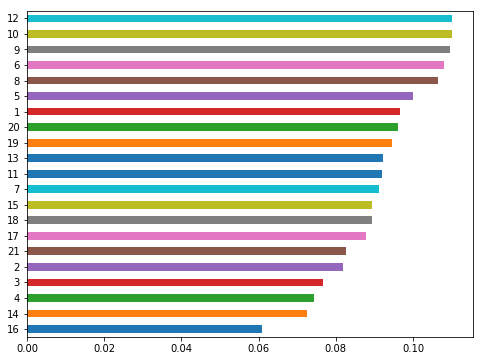

In [10]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
IGR.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-互信息

In [11]:
X_1 = data.drop(labels=['bug'], axis=1)
y_1 = data['bug']

In [12]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_1, y_1)
mutual_info

array([0.27684041, 0.16717901, 0.0968578 , 0.14395143, 0.28717894,
       0.28148168, 0.27155533, 0.23840332, 0.23601987, 0.2366919 ,
       0.26266739, 0.24044384, 0.25132395, 0.09935753, 0.24323696,
       0.00493756, 0.33043438, 0.27815118, 0.23690944, 0.26245753,
       0.16079401])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_1.columns
mutual_info.sort_values(ascending=False)

17    0.330434
5     0.287179
6     0.281482
18    0.278151
1     0.276840
7     0.271555
11    0.262667
20    0.262458
13    0.251324
15    0.243237
12    0.240444
8     0.238403
19    0.236909
10    0.236692
9     0.236020
2     0.167179
21    0.160794
4     0.143951
14    0.099358
3     0.096858
16    0.004938
dtype: float64

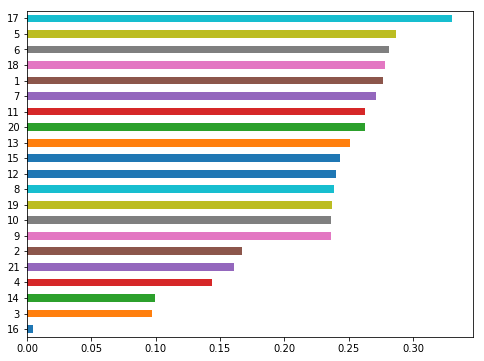

In [15]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
mutual_info.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-卡方值

In [16]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_1,y_1)
f_p_values

(array([1.33813037e+02, 7.01726607e+01, 2.68819596e+01, 6.06668296e+01,
        1.97115663e+02, 2.58302177e+02, 2.99936676e+01, 1.34598572e+02,
        9.07654560e+01, 4.51921816e+02, 3.95972290e+01, 5.36836827e+02,
        2.59152027e+02, 1.29581551e+02, 2.16960279e+02, 3.10992666e-01,
        6.38794283e+01, 1.66575748e+02, 1.95430649e+02, 2.42268763e+02,
        1.10618788e+02]),
 array([6.00305081e-031, 5.43342749e-017, 2.16268220e-007, 6.75996658e-015,
        8.89776858e-045, 4.02351409e-058, 4.33459527e-008, 4.04149879e-031,
        1.61752785e-021, 2.75344970e-100, 3.12125865e-010, 9.19555381e-119,
        2.62636546e-058, 5.05944654e-030, 4.16336746e-049, 5.77071684e-001,
        1.32271667e-015, 4.14095840e-038, 2.07502378e-044, 1.25899314e-054,
        7.17166313e-026]))

In [17]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_1.columns
p_values

1      6.003051e-31
2      5.433427e-17
3      2.162682e-07
4      6.759967e-15
5      8.897769e-45
6      4.023514e-58
7      4.334595e-08
8      4.041499e-31
9      1.617528e-21
10    2.753450e-100
11     3.121259e-10
12    9.195554e-119
13     2.626365e-58
14     5.059447e-30
15     4.163367e-49
16     5.770717e-01
17     1.322717e-15
18     4.140958e-38
19     2.075024e-44
20     1.258993e-54
21     7.171663e-26
dtype: float64

In [18]:
p_values.sort_index(ascending=False)

9      1.617528e-21
8      4.041499e-31
7      4.334595e-08
6      4.023514e-58
5      8.897769e-45
4      6.759967e-15
3      2.162682e-07
21     7.171663e-26
20     1.258993e-54
2      5.433427e-17
19     2.075024e-44
18     4.140958e-38
17     1.322717e-15
16     5.770717e-01
15     4.163367e-49
14     5.059447e-30
13     2.626365e-58
12    9.195554e-119
11     3.121259e-10
10    2.753450e-100
1      6.003051e-31
dtype: float64

# --------------------------------------------------------------------------------------------

In [10]:
del data['3']
del data['16']
del data['14']

In [11]:
data.head()

,1,2,4,5,6,7,8,9,10,11,12,13,15,17,18,19,20,21,bug
0,1.609438,0.693147,0.693147,1.609438,2.197225,0.512824,0.916291,1.845300,2.564949,0.000000,0.512824,1.098612,0.000000,1.386294,0.693147,1.386294,0.693147,0.693147,0.0
1,3.440424,0.845543,0.782293,4.047730,5.556741,0.098336,2.384086,3.303638,7.839978,0.078987,4.956367,3.120755,1.233898,2.502505,2.622764,3.550815,3.153827,2.190275,1.0
2,3.395635,1.386294,1.386294,4.322673,5.866032,0.079520,2.566237,3.410665,8.349538,0.110839,5.463206,3.238984,0.986052,2.604675,2.708050,3.880252,3.327436,1.791759,1.0
3,2.890372,1.098612,1.098612,3.610918,4.976734,0.113329,2.233235,2.905808,7.090910,0.048790,4.214643,2.708050,0.693147,2.397895,1.945910,3.295837,2.397895,1.386294,0.0
4,1.098612,0.693147,0.693147,1.386294,1.749200,0.693147,0.693147,1.749200,1.749200,0.000000,0.231112,0.000000,0.000000,1.098612,0.693147,1.098612,0.693147,0.693147,0.0


In [12]:
X = data.drop(labels=['bug'], axis=1)
y = data['bug']

# 特征相关性分析阶段

In [13]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Symmetrical Uncertainty
#entropy
from scipy.stats import entropy
import numpy as np
#Joint Entropy
def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)

#conditional entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

#SU
def symmetricalUncertain(Y,X):
    n = float(y.shape[0])
    vals = np.unique(Y)
    # Computing Entropy for the feature x. 
    Hx = entropy(X)
    # Computing Entropy for the feature y.
    Hy = entropy(Y)
    #Computing Joint entropy between x and y.
    Hxy = jEntropy(Y,X)
    IG = Hx-Hxy
    return 2*IG/(Hx+Hy)

In [39]:
top_n1 =[]
for i in X.columns.values:
    X[i]=X[i].astype('float64')
    top_n1.append(symmetricalUncertain(X[i],X["13"]))
# print (top_n1)
top_n2=[row[1] for row in top_n1]
print (top_n2)

col_name1 = np.array(X.columns)
a1 = pd.DataFrame(top_n2)
b1 = pd.DataFrame(col_name1)
info3 = pd.concat([a1,b1], axis=1)
info3.columns = ['Score','Features']
# info3

[-4.002665516163573e-16, -4.0159466488320203e-16, -4.014168672089922e-16, -4.0083090736974776e-16, -4.0123752504808077e-16, -4.1047596750669053e-16, -4.0200187623047065e-16, -4.004142509872339e-16, -4.020464547898674e-16, -4.2217469012521575e-16, -4.0581234116531253e-16, -4.0533842110466523e-16, -4.182631073626356e-16, -3.995686651531973e-16, -4.024903728924649e-16, -4.0122402975777913e-16, -4.032146908732262e-16, -4.028404382522552e-16]


In [38]:
SU = pd.Series(top_n2)
SU.index = X.columns
SU.sort_values(ascending=False)

17   -2.642463e-16
1    -2.647041e-16
9    -2.648010e-16
5    -2.650743e-16
19   -2.653322e-16
6    -2.653410e-16
4    -2.654587e-16
2    -2.655753e-16
8    -2.658424e-16
10   -2.658717e-16
18   -2.661629e-16
21   -2.663925e-16
20   -2.666380e-16
13   -2.680310e-16
12   -2.683418e-16
7    -2.714002e-16
15   -2.765058e-16
11   -2.790699e-16
dtype: float64

In [40]:
corr_features = ["6","5","8","9","20","18","19","10","13"]
data2=data.drop(corr_features,axis=1)
data2.head()

,1,2,4,7,11,12,15,17,21,bug
0,1.609438,0.693147,0.693147,0.512824,0.000000,0.512824,0.000000,1.386294,0.693147,0.0
1,3.440424,0.845543,0.782293,0.098336,0.078987,4.956367,1.233898,2.502505,2.190275,1.0
2,3.395635,1.386294,1.386294,0.079520,0.110839,5.463206,0.986052,2.604675,1.791759,1.0
3,2.890372,1.098612,1.098612,0.113329,0.048790,4.214643,0.693147,2.397895,1.386294,0.0
4,1.098612,0.693147,0.693147,0.693147,0.000000,0.231112,0.000000,1.098612,0.693147,0.0


In [41]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop("bug",axis=1),
    data2["bug"],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((650, 9), (279, 9))

In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score,roc_auc_score
SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
#SVM.score(X_test,y_test)
f1_score1 = f1_score(y_test,y_pred)
roc_auc_score1 = roc_auc_score(y_test,y_pred)
print(f1_score1)
print(roc_auc_score1)

0.7588652482269502
0.7562435765673176
